In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3

%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [35]:
with sqlite3.connect("..\\db.sqlite3") as conn:
    table1 = pd.read_sql("SELECT * FROM restaurant_order", conn)
    table2 = pd.read_sql("SELECT * FROM restaurant_orderitem", conn)
    table3 = pd.read_sql("SELECT * FROM restaurant_product", conn)
    merged_data = pd.merge(table1, table2, left_on="id", right_on="order_id")
    final_data = pd.merge(merged_data, table3, left_on="product_id", right_on="id")
    final_data.to_csv("restaurant.csv", index=True)

df = pd.read_csv("restaurant.csv", index_col=[0])
df


,id_x,datetime,id_y,quantity,order_id,product_id,id,price,name
0,1,2019-08-03 20:25:00,1,2,1,6,6,0.80,Plain Papadum
1,1,2019-08-03 20:25:00,2,1,1,240,240,12.95,King Prawn Balti
2,1,2019-08-03 20:25:00,3,1,1,19,19,2.95,Garlic Naan
3,1,2019-08-03 20:25:00,4,1,1,36,36,3.95,Mushroom Rice
4,1,2019-08-03 20:25:00,5,1,1,111,111,8.95,Paneer Tikka Masala
...,...,...,...,...,...,...,...,...,...
74813,13393,2017-02-23 18:20:00,74452,1,13393,226,226,12.95,Lamb Shashlick Curry
74814,13394,2016-10-23 16:03:00,74564,3,13394,222,222,12.95,Tandoori King Prawn Garlic
74815,13395,2018-12-24 13:22:00,74702,2,13395,247,247,17.95,House Red wine 75cl
74816,13396,2017-08-31 12:20:00,74748,2,13396,248,248,17.95,House white wine 75cl


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

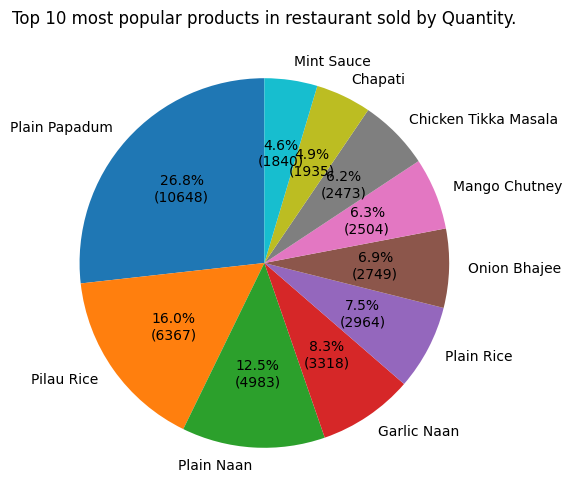

In [36]:
top_products = df.groupby(["product_id", "name"])["quantity"].sum().reset_index()
top_products = top_products.sort_values(by="quantity", ascending=False)
top_10 = top_products.head(10)
def pct_format(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f"{pct:.1f}%\n({absolute})"
plt.figure(figsize=(10, 6))
plt.pie(
    top_10["quantity"],
    labels=top_10["name"],
    autopct= lambda pct: pct_format(pct, top_10["quantity"]),
    startangle=90
)
plt.title("Top 10 most popular products in restaurant sold by Quantity.")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

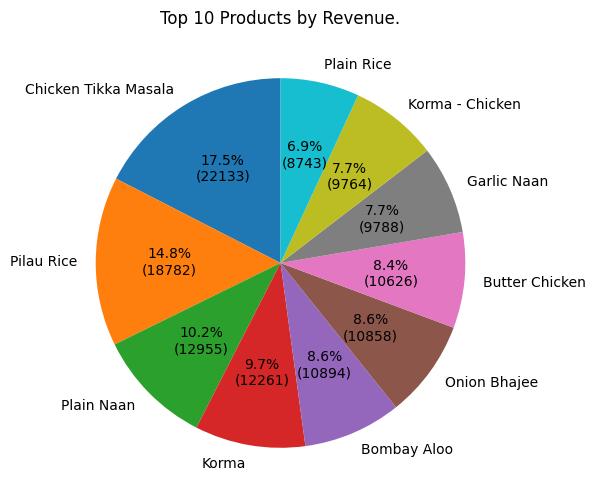

In [37]:
df["Item Price"] = df["price"] * df["quantity"]
products_by_price = df.groupby(["product_id", "name"])["Item Price"].sum().reset_index()
top_10_by_price = products_by_price.sort_values(by="Item Price", ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.pie(
    top_10_by_price["Item Price"],
    labels=top_10_by_price["name"],
    autopct= lambda pct: pct_format(pct, top_10_by_price["Item Price"]),
    startangle=90
)
plt.title("Top 10 Products by Revenue.")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

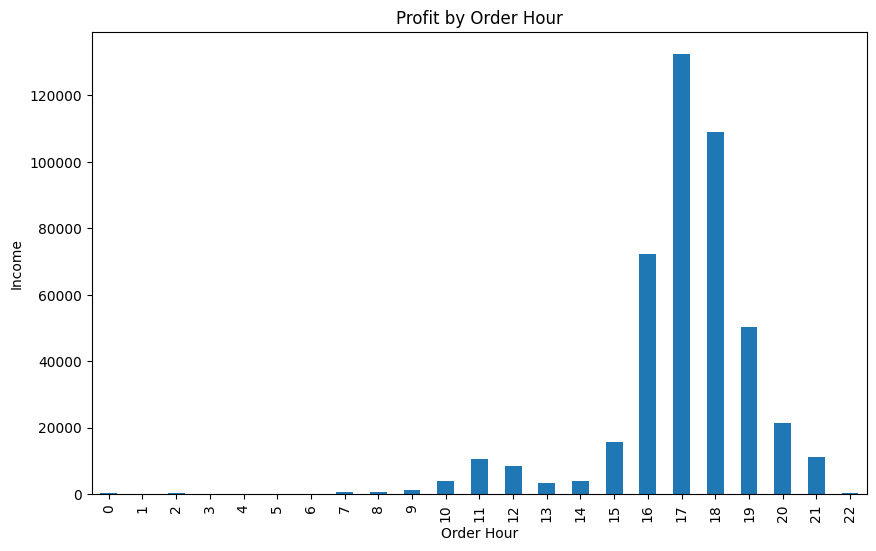

In [38]:
df["order_datetime"] = pd.to_datetime(df["datetime"])
df["Order Hour"] = df["order_datetime"].dt.hour
income_per_hour = df.groupby("Order Hour")["Item Price"].sum().reset_index()

plt.figure(figsize=(10, 6))
income_per_hour["Item Price"].plot(kind="bar")
plt.xlabel("Order Hour")
plt.ylabel("Income")
plt.title("Profit by Order Hour")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

C:\Users\supva\AppData\Local\Temp\ipykernel_8680\2062506319.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_per_day = df.groupby("Order Day Of The Week")["Item Price"].sum()


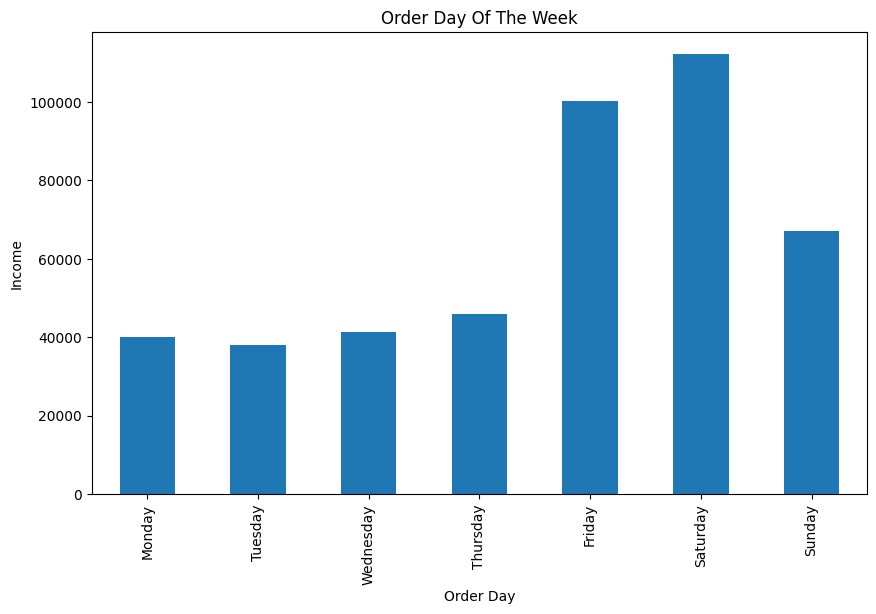

In [39]:
week_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Order Day Of The Week"] = pd.Categorical(
    df["order_datetime"].dt.day_name(),
    categories=week_days,
    ordered=True
)
income_per_day = df.groupby("Order Day Of The Week")["Item Price"].sum()

plt.figure(figsize=(10, 6))
income_per_day.plot(kind="bar")
plt.xlabel("Order Day")
plt.ylabel("Income")
plt.title("Order Day Of The Week")
plt.show()